In [ ]:
#DESCRIPCIÓN: Este programa predice el precio de la acción de AMD para un día específico

In [ ]:
#Importar las librerías
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Cargar y mostrar la data
df = pd.read_csv('AMD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,160.369995,160.880005,148.919998,149.110001,149.110001,64039100
1,2021-12-02,147.679993,152.529999,146.470001,150.679993,150.679993,56161200
2,2021-12-03,151.649994,152.380005,140.720001,144.009995,144.009995,65856800
3,2021-12-06,141.139999,141.309998,134.199997,139.059998,139.059998,66776500
4,2021-12-07,143.899994,145.759995,141.000000,144.850006,144.850006,53359400
5,2021-12-08,144.960007,147.039993,142.699997,145.240005,145.240005,40977500
6,2021-12-09,145.160004,146.690002,137.800003,138.100006,138.100006,53019900
7,2021-12-10,141.289993,141.369995,135.820007,138.550003,138.550003,42187900
8,2021-12-13,138.250000,139.399994,133.419998,133.800003,133.800003,42174000
9,2021-12-14,131.669998,137.240005,130.600006,135.600006,135.600006,50754600


In [ ]:
#Obtener el número de filas y columnas
df.shape

(22, 7)

In [ ]:
#Mostrar la última fila de la data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
21,2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49416000


In [ ]:
#Preparar la data para entrenar los modelos SVR
#Obtener todos de la data excepto de la última fila
df = df.head(len(df)-1)

#Imprimir el nuevo data set
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0   2021-12-01  160.369995  160.880005  148.919998  149.110001  149.110001   
1   2021-12-02  147.679993  152.529999  146.470001  150.679993  150.679993   
2   2021-12-03  151.649994  152.380005  140.720001  144.009995  144.009995   
3   2021-12-06  141.139999  141.309998  134.199997  139.059998  139.059998   
4   2021-12-07  143.899994  145.759995  141.000000  144.850006  144.850006   
5   2021-12-08  144.960007  147.039993  142.699997  145.240005  145.240005   
6   2021-12-09  145.160004  146.690002  137.800003  138.100006  138.100006   
7   2021-12-10  141.289993  141.369995  135.820007  138.550003  138.550003   
8   2021-12-13  138.250000  139.399994  133.419998  133.800003  133.800003   
9   2021-12-14  131.669998  137.240005  130.600006  135.600006  135.600006   
10  2021-12-15  135.110001  146.690002  133.809998  146.500000  146.500000   
11  2021-12-16  147.000000  147.929993  137.020004  138.639999  

In [ ]:
#Crear listas vacías para almacenar la data independiente y dependiente
days = list()
adj_close_prices = list()

In [ ]:
#Obtener la fecha y el precio de cierre ajustado
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
#Crear el data set independiente
for day in df_days:
    days.append([int(day.split('-')[2])])
    
#Crear el data set dependiente
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [ ]:
#Imprimir los días y los precios de cierre ajustados
print(days)
print(adj_close_prices)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [27], [28], [29], [30]]
[149.110001, 150.679993, 144.009995, 139.059998, 144.850006, 145.240005, 138.100006, 138.550003, 133.800003, 135.600006, 146.5, 138.639999, 137.75, 135.800003, 144.25, 143.880005, 146.139999, 154.360001, 153.149994, 148.259995, 145.149994]


In [ ]:
#Crear los modelos de Support Vector Regression

#Crear y entrenar un modelo SVR usando linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Crear y entrenar un modelo SVR usando polynomial kernel
poly_svr = SVR(kernel='poly', degree=2)
poly_svr.fit(days, adj_close_prices)

#Crear y entrenar un modelo SVR usando rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

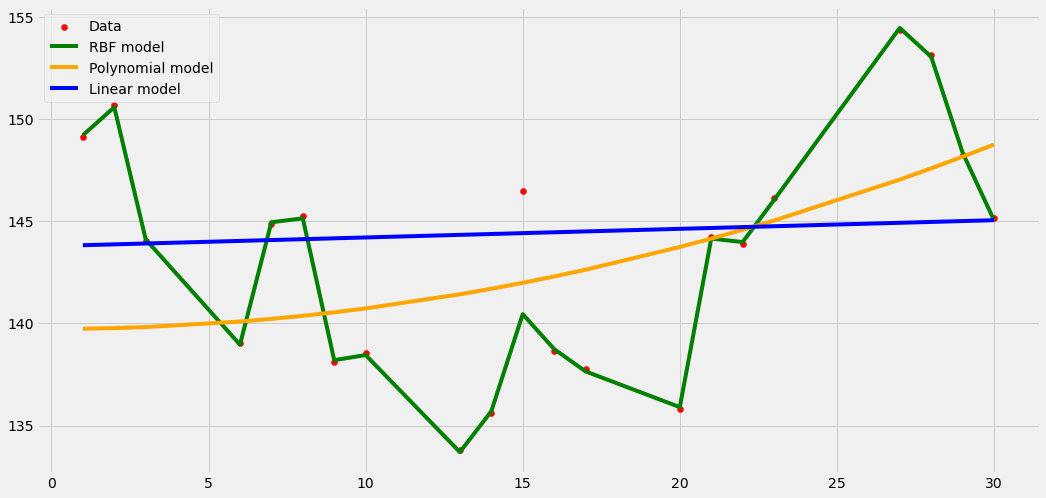

In [ ]:
#Mostrar los modelos en un gráfico para ver cuál tiene el mejor ajuste a la data original
plt.figure(figsize=(16, 8))
plt.scatter(days, adj_close_prices, color='red', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear model')
plt.legend()
plt.show()

In [ ]:
#Mostrar la predicción del precio para un dia dado
day = [[31]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [146.30865635]
The Linear SVR predicted: [145.09221619]
The Polynomial SVR predicted: [149.36300028]


In [ ]:
#Imprimr el precio actual de la acción en el día 31
print('The actual price:', actual_price['Adj Close'][21])

The actual price: 143.899994


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e251de5-0dc4-4401-98b7-759471e83f8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>